## Airline Flight Data Exploration
### by Aaron Eisenberg

In this project we will explore patterns and relationships related to flight cancellations and delays as they pertain to different airlines and airports.  We begin with data gathering and basic exploration, then proceed to data cleaning and the heart of the project are the visual exploration and visual explantion sections.  In the explanatory visualization section we view this information from the perspective of a travel insurance company.

Data for this project was obtained from the following website:

http://stat-computing.org/dataexpo/2009/the-data.html

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Gathering

In [68]:
df1999 = pd.read_csv('1999.csv')
df2000 = pd.read_csv('2000.csv')
df2001 = pd.read_csv('2001.csv', encoding="ISO-8859-1")
df2002 = pd.read_csv('2002.csv', encoding="ISO-8859-1")
df2003 = pd.read_csv('2003.csv', encoding="ISO-8859-1")

In [2]:
df2004 = pd.read_csv('2004.csv', encoding="ISO-8859-1")
df2005 = pd.read_csv('2005.csv', encoding="ISO-8859-1")
df2006 = pd.read_csv('2006.csv', encoding="ISO-8859-1")

In [3]:
df2007 = pd.read_csv('2007.csv', encoding="ISO-8859-1")
df2008 = pd.read_csv('2008.csv', encoding="ISO-8859-1")

The following article on encoding was helpful in reading the csv files:

https://stackoverflow.com/questions/19699367/unicodedecodeerror-utf-8-codec-cant-decode-byte

### Data Exploration

In [5]:
df1999.shape, df2000.shape, df2001.shape, df2002.shape, df2003.shape, df2004.shape, df2005.shape, \
df2006.shape, df2007.shape, df2008.shape

((5527884, 29),
 (5683047, 29),
 (5967780, 29),
 (5271359, 29),
 (6488540, 29),
 (7129270, 29),
 (7140596, 29),
 (7141922, 29),
 (7453215, 29),
 (7009728, 29))

For most of our analysis we will be using 2 years of data in the df_2yr DataFrame.
The same code can be run using the df_5yr or df_10yr DataFrame should a user wish to use 5 or 10 years of data.

In [16]:
df_10yr = pd.concat([df1999, df2000, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008], axis=0)

In [4]:
df_5yr = pd.concat([df2004, df2005, df2006, df2007, df2008], axis=0)

In [5]:
df_2yr = pd.concat([df2007, df2008], axis=0)

#### Variable descriptions as provided in the website from which the data was obtained


#### Name    and       Description
1.	*Year*	       1987-2008
2.	*Month*	      1-12
3.	*DayofMonth*	  1-31
4.	*DayOfWeek*	1 (Monday) - 7 (Sunday)
5.	*DepTime*	actual departure time (local, hhmm)
6.	*CRSDepTime*	scheduled departure time (local, hhmm)
7.	*ArrTime*	actual arrival time (local, hhmm)
8.	*CRSArrTime*	scheduled arrival time (local, hhmm)
9.	*UniqueCarrier*	unique carrier code
10.	*FlightNum*	flight number
11. *TailNum*	plane tail number
12.	*ActualElapsedTime*	in minutes
13.	*CRSElapsedTime*	in minutes
14.	*AirTime*	in minutes
15.	*ArrDelay*	arrival delay, in minutes
16.	*DepDelay*	departure delay, in minutes
17.	*Origin*	origin IATA airport code
18.	*Dest*	destination IATA airport code
19.	*Distance*	in miles
20.	*TaxiIn*	taxi in time, in minutes
21.	*TaxiOut*	taxi out time in minutes
22.	*Cancelled*	was the flight cancelled?
23.	*CancellationCode*	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	*Diverted*	1 = yes, 0 = no
25.	*CarrierDelay*	in minutes
26. *WeatherDelay*	in minutes
27.	*NASDelay*	in minutes
28.	*SecurityDelay*	in minutes
29.	*LateAircraftDelay*	in minutes

Additionally, the following article provides clarification on what an 'NAS' cancellation is:
http://www.flightbucks.com/blog/9-biggest-causes-of-flight-delays-or-cancellations

In [6]:
df_2yr.shape

(14462943, 29)

In [7]:
df_2yr.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
df_2yr.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_2yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14462943 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 3.2+ GB


In [10]:
# Are there null values?
df_2yr.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                296994
CRSDepTime                  0
ArrTime                329576
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83387
ActualElapsedTime      332626
CRSElapsedTime           1838
AirTime                332626
ArrDelay               332626
DepDelay               296994
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     14164760
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
dtype: int64

In [11]:
print(df_2yr.Cancelled.value_counts(), '\n')
print(df_2yr.CancellationCode.value_counts())

0    14164761
1      298182
Name: Cancelled, dtype: int64 

A    121109
B    116840
C     60183
D        51
Name: CancellationCode, dtype: int64


In [12]:
df_2yr.Diverted.value_counts()

0    14428499
1       34444
Name: Diverted, dtype: int64

In [13]:
# Range for ArrDelay Column:
df_2yr.ArrDelay.min(), df_2yr.ArrDelay.max()

(-519.0, 2598.0)

In [14]:
# Are all times between 00:00 and 23:59?
df_2yr['DepTime'].min(), df_2yr['ArrTime'].min(), df_2yr['DepTime'].max(), df_2yr['ArrTime'].max()

(1.0, 1.0, 2400.0, 2400.0)

In [15]:
# How many times does '2400' appear as the departure or arrival time?
df_2yr[df_2yr['ArrTime'] == 2400]['ArrTime'].count(), df_2yr[df_2yr['DepTime'] == 2400]['DepTime'].count(), \
df_2yr[df_2yr['CRSArrTime'] == 2400]['CRSArrTime'].count(), df_2yr[df_2yr['CRSDepTime'] == 2400]['CRSDepTime'].count()

(5352, 1293, 1273, 0)

#### Data Cleaning Steps Required:

- Update or drop rows with null values in key columns such as 'DepTime' since those mostly likely represent cancelled flights, or as an alternative, split the data into 2 DataFrames - one for cancelled flights and another for completed flights since we will be graphing and analyzing them separately


- Update format of the DepTime, CRSDepTime, ArrTime, CRSArrTime so that we are dealing with times on a 24-hour period; either a string or a datetime format should be fine for our analysis


- Drop or modify rows where the arrival time or departure time is not recorded as a normal time between 00:00 and 23:59


Note: If we decide to chart arrivals or departures hourly then it will be preferable that we have midnight recorded as 00:00 so that it can be part of the 00:XX hour rather than the only minute in the 24:XX hour.

### Data Cleaning and Tidiness

#### For the analysis I am most interested in reviewing data related to cancelled flights and delayed flights.

We will create a separate DataFrame for cancelled flights.  Other slicing of the DataFrames will be performed as needed to view particular subsets.

In [16]:
# We may wish to work with departure time as a string.
df_2yr['dep_time'] = df_2yr.loc[:, 'CRSDepTime'].astype(str)

In [17]:
df_cancels = df_2yr.query("Cancelled == 1")

In [18]:
df_cancels_5yr = df_5yr.query("Cancelled == 1")

In [19]:
df_flown = df_2yr.query("Cancelled == 0")

In [20]:
df_flown.shape, df_cancels.shape

((14164761, 30), (298182, 30))

In [21]:
df_flown = df_flown.dropna(subset=['ArrTime', 'ActualElapsedTime'], how='any')

In [22]:
df_flown.shape

(14130317, 30)

In [23]:
# Verification of dropping of nulls
df_flown.DepTime.isna().sum(), df_flown.ArrTime.isna().sum(), df_flown.CRSDepTime.isna().sum(), \
df_flown.CRSArrTime.isna().sum(), df_flown.ActualElapsedTime.isna().sum()

(0, 0, 0, 0, 0)

In [24]:
# Set time columns to be strings.  This is the preferred data type in this case so that we can view hourly departures 
# and other similar stats.

df_flown[['DepTime', 'ArrTime']] = df_flown[['DepTime', 'ArrTime']].astype(int)
df_flown[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']] = df_flown[['DepTime', 'CRSDepTime', 
                                                                     'ArrTime', 'CRSArrTime']].astype(str)

In [25]:
# Set time columns to 4 numeric characters
df_flown['DepTime'] = df_flown['DepTime'].apply(lambda x: x.zfill(4))
df_flown['CRSDepTime'] = df_flown['CRSDepTime'].apply(lambda x: x.zfill(4))
df_flown['ArrTime'] = df_flown['ArrTime'].apply(lambda x: x.zfill(4))
df_flown['CRSArrTime'] = df_flown['CRSArrTime'].apply(lambda x: x.zfill(4))

In [26]:
# Check to see largest value recorded in the key time fields
print(sorted(df_2yr['DepTime'].unique())[-1]), print(sorted(df_2yr['ArrTime'].unique())[-1]);

2400.0
2400.0


In [27]:
# Set midnight values to 0000
df_flown['DepTime'].replace({'2400': '0000'}, inplace=True)
df_flown['CRSDepTime'].replace({'2400': '0000'}, inplace=True)
df_flown['ArrTime'].replace({'2400': '0000'}, inplace=True)
df_flown['CRSArrTime'].replace({'2400': '0000'}, inplace=True)

In [28]:
# Verification
print(sorted(df_flown['DepTime'].unique())[0], sorted(df_flown['DepTime'].unique())[-1])
print(sorted(df_flown['CRSDepTime'].unique())[0], sorted(df_flown['CRSDepTime'].unique())[-1])
print(sorted(df_flown['ArrTime'].unique())[0], sorted(df_flown['ArrTime'].unique())[-1])
print(sorted(df_flown['CRSArrTime'].unique())[0], sorted(df_flown['CRSArrTime'].unique())[-1])

0000 2359
0000 2359
0000 2359
0000 2359


In [29]:
df_flown['DepTime'] = df_flown['DepTime'].str[:2] + ':' + df_flown['DepTime'].str[2:]
df_flown['CRSDepTime'] = df_flown['CRSDepTime'].str[:2] + ':' + df_flown['CRSDepTime'].str[2:]
df_flown['ArrTime'] = df_flown['ArrTime'].str[:2] + ':' + df_flown['ArrTime'].str[2:]
df_flown['CRSArrTime'] = df_flown['CRSArrTime'].str[:2] + ':' + df_flown['CRSArrTime'].str[2:]

In [30]:
df_flown['DepHour'] = df_flown['DepTime'].str[:2]
df_flown['ArrHour'] = df_flown['ArrTime'].str[:2]

In [31]:
# Verification
print(len(df_flown.DepHour.unique()))
print(sorted(df_flown.DepHour.unique()))

24
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [32]:
carrier_code_list = sorted(df_2yr.UniqueCarrier.unique())
print(carrier_code_list)

['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']


Airline codes were obtained from this website:

#### https://www.iata.org/publications/Pages/code-search.aspx

In [33]:
# Later, if we wish to name a carrier by name rather than code we will have a dictionary from which we can do so.
carrier_code_dict = {'9E':'Endeavor Air', 'AA':'AmericanAirlines', 'AQ':'9 Air Co Ltd', 'AS': 'Alaska Airlines',
                     'B6': 'Jetblue Airways', 'CO': 'Continental', 'DL': 'Delta', 'EV': 'ExpressJet Airlines', 
                     'F9': 'Frontier Airlines', 'FL': 'not_available', 'HA': 'Hawaiian Airlines', 'MQ': 'Envoy Air', 
                     'NW': 'NorthWest', 'OH': 'PSA Airlines', 'OO': 'SkyWest Airlines', 'UA': 'United Airlines', 
                     'US': 'US Airways', 'WN': 'Southwest Airlines ', 'XE': 'Delux Public Charter', 
                     'YV': 'Mesa Airlines'}

In [34]:
len(carrier_code_list), len(carrier_code_dict)

(20, 20)

In [35]:
# We should also create a dictionary for CancellationCode.
cancellation_dict = {'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}

## Exploratory Visualizations

The exploration begins with some very general information about the flights and cancellations in our datasets and then we begin to focus on some of the specifics of delays and cancellations to see what trends exist.

#### 1. What are the most popular arrival and departure times by hour of the day?

In [36]:
dep_hour_list = df_flown['DepHour'].value_counts()
dep_hour_dict = dict(zip(dep_hour_list.index, dep_hour_list))

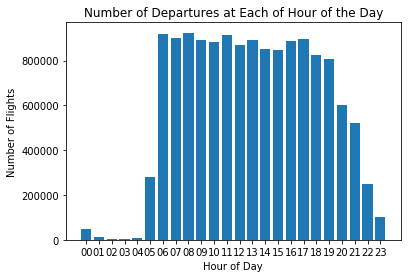

In [37]:
x = sorted(dep_hour_list.index)
y = [dep_hour_dict.get(i) for i in x]
plt.bar(x, y)
plt.title('Number of Departures at Each of Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights');

In [38]:
arr_hour_list = df_flown['ArrHour'].value_counts()
arr_hour_dict = dict(zip(arr_hour_list.index, arr_hour_list))

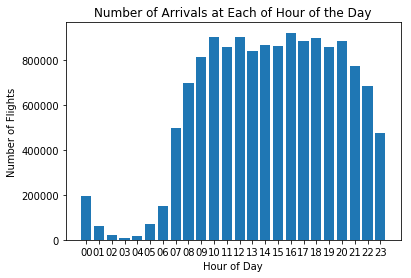

In [39]:
a = sorted(arr_hour_list.index)
b = [arr_hour_dict.get(i) for i in x]
plt.bar(a, b)
plt.title('Number of Arrivals at Each of Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights');

Both arrivals and departures generally occur throughout the day from 7 am to midnight.

#### 2. Are certain airlines overrepresented or underrepresented in the Completed Flights or the Cancelled Flights datasets?

In [40]:
carrier_code_list
counts = []
for i in carrier_code_list:
    counts.append(df_2yr[df_2yr['UniqueCarrier'] == i]['UniqueCarrier'].count())

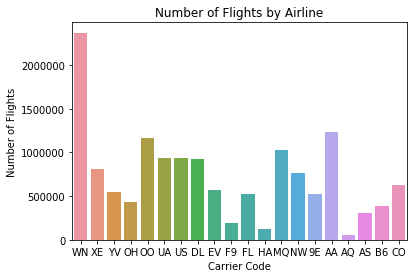

In [41]:
sns.countplot(x='UniqueCarrier', data=df_2yr)
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Airline');

In [42]:
# Note that this includes cancelled flights
print('Top three airlines in our dataset:')
print(carrier_code_dict.get('WN'), max(counts), 'flights')
print(carrier_code_dict.get('AA'), df_2yr[df_2yr['UniqueCarrier'] == 'AA']['UniqueCarrier'].count(), 'flights')
print(carrier_code_dict.get('OO'), df_2yr[df_2yr['UniqueCarrier'] == 'OO']['UniqueCarrier'].count(), 'flights')

Top three airlines in our dataset:
Southwest Airlines  2370625 flights
AmericanAirlines 1238742 flights
SkyWest Airlines 1165041 flights


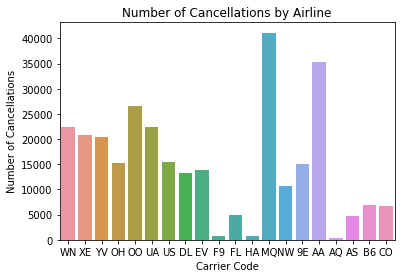

In [43]:
sns.countplot(x='UniqueCarrier', data=df_cancels)
plt.xlabel('Carrier Code')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations by Airline');

Let's also look at cancellations for the specific airlines with the hightest number of cancellations.

In [44]:
cancel_list1 = [i for i in df_cancels.UniqueCarrier.value_counts() if i > int(2e4)]
length1 = len(cancel_list1)
carriers1 = [i for i in df_cancels.UniqueCarrier.value_counts().index[0:length1]]
carriers1_1 = [carrier_code_dict.get(i) for i in df_cancels.UniqueCarrier.value_counts().index[0:length1]]

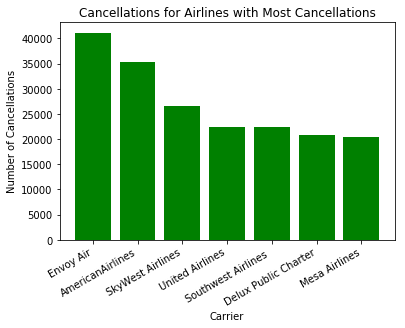

In [46]:
plt.bar(carriers1_1, cancel_list1, color='green')
plt.ylabel('Number of Cancellations')
plt.xlabel('Carrier')
plt.title('Cancellations for Airlines with Most Cancellations')
plt.xticks(rotation=30, ha='right');

#### 3. What departure cities are most represented in the Completed Flights or the Cancelled Flights datasets?

In [47]:
highest_dep_cities = df_flown.Origin.value_counts().index[:5]
d = df_flown.Origin.value_counts()[0:5].tolist()

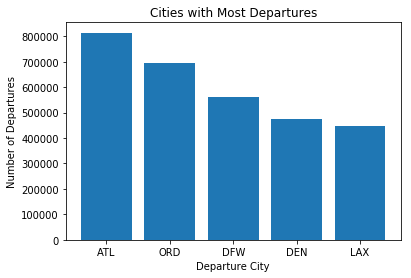

In [48]:
plt.bar(highest_dep_cities, d)
plt.xlabel('Departure City')
plt.ylabel('Number of Departures')
plt.title('Cities with Most Departures');

#### 4. What about cancellations based on destination?

In [49]:
top5_cancel_cities = df_cancels.Origin.value_counts().index[:5]
f = df_cancels.Origin.value_counts()[0:5].tolist()

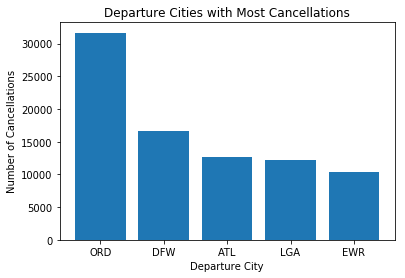

In [50]:
plt.bar(top5_cancel_cities, f)
plt.xlabel('Departure City')
plt.ylabel('Number of Cancellations')
plt.title('Departure Cities with Most Cancellations');

Denver and Los Angeles are among the busiest airports in terms of total flights but they are not in the top five for cancellations.  That would imply that their cancellations as a percentage of total flights is relatively low.

#### 5. Do cancellations occur at a particular time of year?

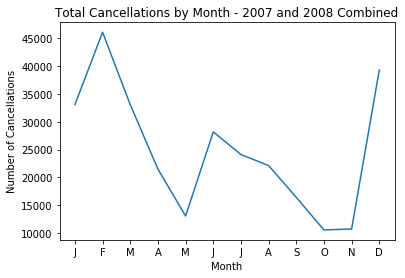

In [51]:
m = df_cancels['Month'].unique()
y = [df_cancels[df_cancels['Month'] == i]['Cancelled'].sum() for i in m]
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

plt.xticks(np.arange(1, 13, 1), months)
plt.title('Total Cancellations by Month - 2007 and 2008 Combined')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.plot(m, y);

Let's make sure that the trend is similar when viewing 5 years of data.

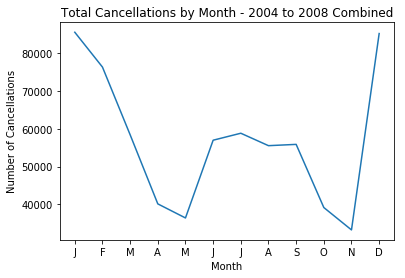

In [52]:
m = df_cancels_5yr['Month'].unique()
y = [df_cancels_5yr[df_cancels_5yr['Month'] == i]['Cancelled'].sum() for i in m]
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

plt.xticks(np.arange(1, 13, 1), months)
plt.title('Total Cancellations by Month - 2004 to 2008 Combined')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.plot(m, y);

The largest increases occur during the winter and, to a lesser extent, in the summer months.  I was expecting to see more of a spike in August and September due to hurricane season in many southern states but winter weather appears to be a much more imporant factor in cancellations.


#### 6. What is the most common cause of cancellations?

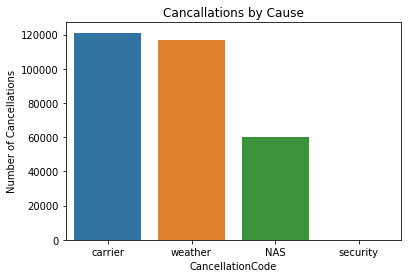

In [53]:
ticks = [cancellation_dict.get(df_cancels.CancellationCode.value_counts().index[0]), 
         cancellation_dict.get(df_cancels.CancellationCode.value_counts().index[1]),
         cancellation_dict.get(df_cancels.CancellationCode.value_counts().index[2]),
         cancellation_dict.get(df_cancels.CancellationCode.value_counts().index[3])]
sns.countplot(data=df_cancels, x='CancellationCode')
plt.title('Cancallations by Cause')
plt.xticks(np.arange(0, 4, 1), ticks)
plt.ylabel('Number of Cancellations');

## Explanatory Visualizations

The focus of our explanatory visualization is answering the following questions:

1. What carriers have the most or fewest cancellations as a percentage of total flights?


2. Are cancellations due to 'carrier' fault more prevalent among certain carriers?


3. Are cancellations more common at certain times of day?


4. Are cancellations due to weather concentrated in a few departure cities?


5. Are longer flights more prone to delay than shorter flights?


6. Are long delays predominantly concentrated in certain cities?


7. Are delays more common at certain times of day?




#### Given the findings above, if I were a travel insurance company would pricing be different based on origin and destination city?  Are there other factors for which pricing differentiation would be appropriate?  This assumes that such pricing segmentation is feasible from a business perspective and allowed by the insurance regulators.

#### 1. Which carriers have the most cancellations as a percentage of total scheduled flights?

In [54]:
# We need to create lists and dictionaries that will allow us to view cancellations as a percentage of total 
#   scheduled flights.
carrier_sched = df_2yr.UniqueCarrier.value_counts().tolist()
carrier_list2 = df_2yr.UniqueCarrier.value_counts().index
cancels2 = df_2yr.groupby('UniqueCarrier')['Cancelled'].sum().tolist()
cancels3 = df_2yr.groupby('UniqueCarrier')['Cancelled'].sum().index
cancel_dict = {i: k for i, k in zip(cancels3, cancels2)}

In [55]:
cancels_ordered = [cancel_dict.get(i) for i in carrier_list2]
cancel_perc = [i/k for i, k in zip(cancels_ordered, carrier_sched)]
cancel_perc_dict = dict(zip(carrier_list2, cancel_perc))

In [56]:
# Obtain position of the largest 10 values in our list of percentages.
perc_sort = np.argsort(cancel_perc)[10:]

# Apply these same positions to the carrier_list2.
top10_list = list(carrier_list2[perc_sort])
top10_names = [carrier_code_dict.get(i) for i in list(carrier_list2[perc_sort])]
top10_perc = list(np.array(cancel_perc)[perc_sort])

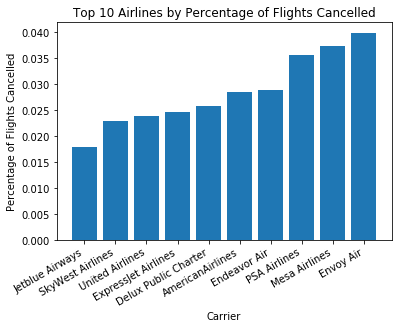

In [58]:
plt.title('Top 10 Airlines by Percentage of Flights Cancelled')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Percentage of Flights Cancelled')
plt.xlabel('Carrier')
plt.yticks(np.arange(0, max(top10_perc) + 0.005, 0.005))
plt.bar(top10_names, top10_perc);

There are substantial differences in the number of cancellations between the airlines in our list so it would be reasonable for a travel insurance company to charge a higher premium for travel with certain airlines.  It is common for airlines to offer travel insurance coverage at the time of ticket purchase.  If an insurance company were providing the coverage for such policies then it would need to have a careful look at the airline's cancellation rate.

#### 2. For the 10 carriers with a high percentage of cancellations, were the cancellations mostly attributed to the carrier or to another cause?

In [59]:
# for each carrier in the carriers1 list we need to get the value counts from the CancellationCode column
cancel_A = df_cancels.query("CancellationCode == 'A'")['UniqueCarrier'].value_counts().tolist()
cancel_A_index = df_cancels.query("CancellationCode == 'A'")['UniqueCarrier'].value_counts().index
cancel_A_dict = {i: k for i, k in zip(cancel_A_index, cancel_A)}

In [60]:
cancel_A_perc = [cancel_A_dict.get(i) / cancel_dict.get(i) for i in top10_list]

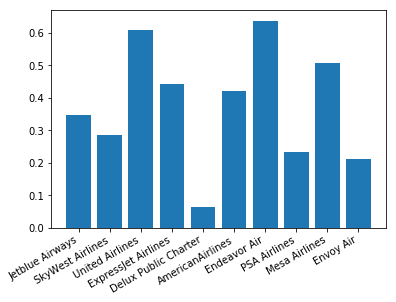

In [61]:
plt.bar(top10_names, cancel_A_perc)
plt.xticks(rotation=30, ha='right');

In most of these ten cases more than half of the cancellations were due to causes that were outside of the airlines' control.  The implication here is that we would need to look at other factors that may lead to cancellations such as time of day, origin city or destination.

#### 3. How much variation is there in cancellations by time of day (scheduled) in general and at some of the busiest airports.

In [62]:
df_2yr['dep_time'] = df_2yr.loc[:, 'dep_time'].apply(lambda x: x.zfill(4)).str[:2]
df_2yr.rename({'dep_time': 'dep_hour'}, axis=1, inplace=True)

In [63]:
a = df_2yr.groupby('dep_hour')['Cancelled'].sum().index
b = df_2yr.groupby('dep_hour')['Cancelled'].sum().tolist()

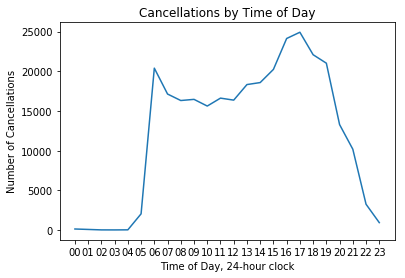

In [64]:
plt.plot(a, b)
plt.title('Cancellations by Time of Day')
plt.ylabel('Number of Cancellations')
plt.xlabel('Time of Day, 24-hour clock');

In [65]:
canc_groups = df_2yr.groupby(['dep_hour', 'Origin'])['Cancelled'].sum()

In [66]:
df_canc_groups = canc_groups.reset_index(name='canc')

In [67]:
df_canc_groups = df_canc_groups[df_canc_groups['Origin'].isin(highest_dep_cities)]

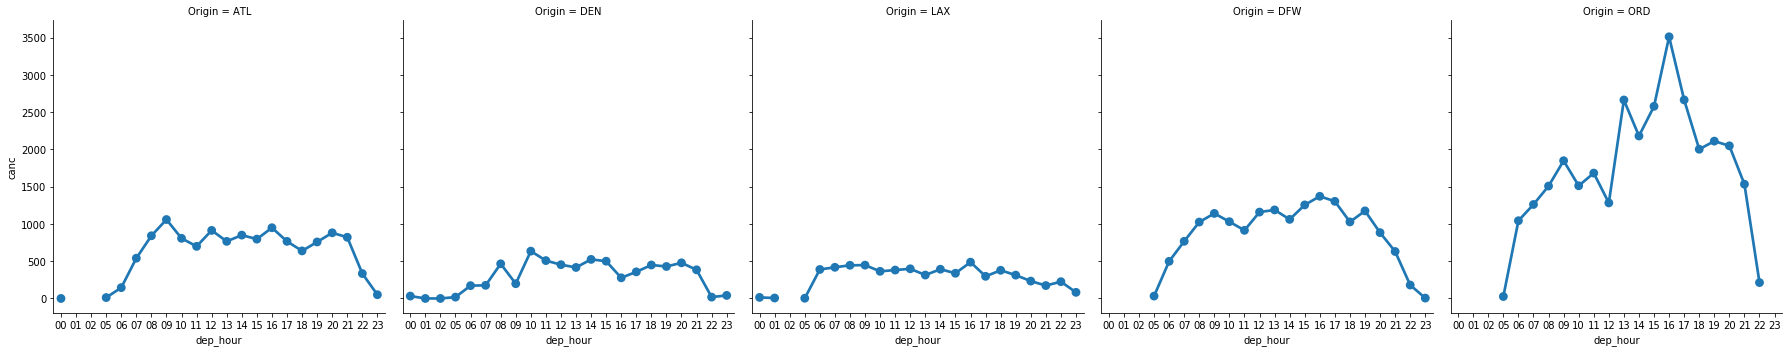

In [68]:
sns.catplot(data=df_canc_groups, x='dep_hour', y='canc', col='Origin', col_wrap=5, kind='point', sharex=True);

Flight cancellations by time of day follows a similar pattern to that of the time of flights in general that we saw in the exploratory visualizations.  There would not be a major benefit for a travel insurance company to segment by time of day for flight cancellation coverage.

At Chicago O'Hare there is a spike in cancellations from noon to 6pm.  In other major airports, however, the number of cancellations shows little variation by time of day.  This would imply that a travel insurance company may not benefit much from charging different premiums for departure times at different times of the day.

#### 4. Are cancellations due to weather concentrated in a few departure and/or arrival cities?

In [104]:
cancellations = df_cancels.groupby(['Origin', 'CancellationCode'])['Cancelled'].sum()

In [105]:
cancellations = cancellations.reset_index(name='total')

In [107]:
cancellations.drop(cancellations[cancellations['CancellationCode'] != 'B'].index, inplace=True)

In [108]:
# Show list of number of 'weather' cancellations in top 15 cities with most cancellations due to weather.
weather_list1 = sorted(cancellations['total'].tolist())
len_w_list1 = len(weather_list1)
print(weather_list1[len_w_list1 - 15: len_w_list1])
print(weather_list1[-15])

[1485, 1501, 1522, 2047, 2098, 2122, 2630, 3337, 3858, 3973, 4326, 4451, 4697, 9078, 11181]
1485


In [109]:
# Drop rows that are not in the top 15
cancellations.drop(cancellations[cancellations['total'] < weather_list1[-15]].index, inplace=True)

In [115]:
# Obtain list of number of scheduled departures for these same 15 cities.
totals_list = []
for i in cancellations['Origin']:
    totals_list.append(df_2yr[df_2yr['Origin'] == i]['Origin'].count())

In [116]:
canc_perc_list = [i/k for i, k in zip(cancellations['total'], totals_list)]

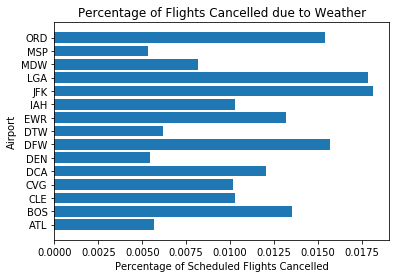

In [137]:
plt.barh(cancellations['Origin'], canc_perc_list)
plt.title('Percentage of Flights Cancelled due to Weather')
plt.xlabel('Percentage of Scheduled Flights Cancelled')
plt.ylabel('Airport');

It appears that winter weather leads to a number of cancellations in New York, Boston and Chicago O'Hare.  Cancellations due to weather are also relatively frequent in Dallas.  Some further investigation is needed, but it would be reasonable for a travel insurer to consider charging higher premiums for flights departing from those airports.

*It is important to note that the same airports that appear here with a high percentage of cancelled flights also appeared in the top 5 in absolute number of cancellations in the exploratory data section.  That would imply that weather is the primary driver.*

#### 5. Along with cancellation I would like to look at trip delay and its possible causes.  Is there any correlation between longer flights and delays?

Travel insurance policies frequently provide coverage for delays of 6 hours or more.  Occasionally a policy provides coverage for a delay of 4 hours.  For this reason I have chosen to look only at those delays of 240 minutes (4 hours) or more.

In [85]:
df_delays1 = df_flown.query("ArrDelay > 240")

In [70]:
df_delays1.shape

(49193, 32)

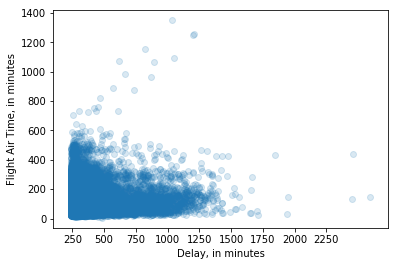

In [71]:
x = df_delays1['ArrDelay']
y = df_delays1['AirTime']
plt.xticks(np.arange(250, 2500, 250))
plt.title('')
plt.xlabel('Delay, in minutes')
plt.ylabel('Flight Air Time, in minutes')
plt.scatter(x, y, alpha=1/6);

There is no readily apparent correlation between the flight duration and the length of the delay.  There are both long and short flights that were subject to delays.  This would imply that there is little reason for a travel insurance company to charge a higher premium for trips with a longer flight duration.

#### 6. Continuing from the previous question, are ceratain airports prone to longer delays?

In order to obtain a dataset with more delays and therefore greater credibility we have chosen to look at flights with a delay of one hour or more for this next section.  We are not, however, interested in delays of less than one hour since they are relatively common and would not trigger any type of insurance coverage in most cases.

In [72]:
df_delays2 = df_flown.query("ArrDelay > 60")

In [73]:
df_delays2.shape

(978598, 32)

In [75]:
# Delays by departure airport, top 10
delays_top10_departures = df_delays2.Origin.value_counts()[0:10]
delays_top10_departures_list = list(delays_top10_departures.index)

In [76]:
print(delays_top10_departures_list)

['ORD', 'ATL', 'DFW', 'EWR', 'DEN', 'JFK', 'IAH', 'DTW', 'SFO', 'LGA']


In [77]:
# create DataFrame that contains only the aiports in the top 10 departure delays list above
df_top10_dep1 = df_delays2[df_delays2['Origin'].isin(delays_top10_departures_list)]

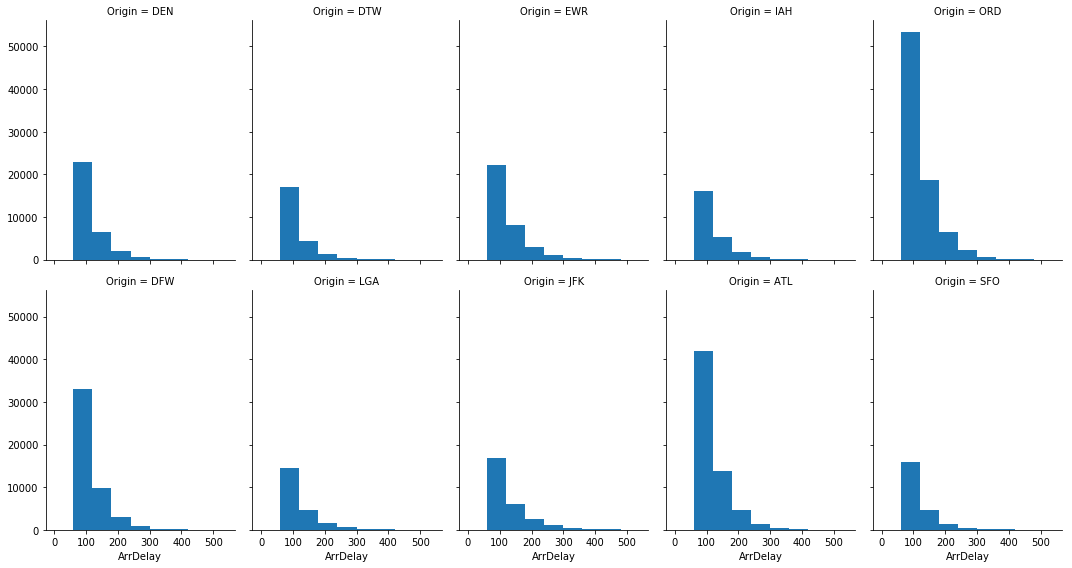

In [80]:
g = sns.FacetGrid(data=df_top10_dep1, col='Origin', col_wrap=5, sharex=True,  height=4, aspect=3/4)
g.map(plt.hist, 'ArrDelay', bins=np.arange(0, 600, 60));

A general view of these ten airports indicates that all of them have a similar distribution of delays with most delays being less than 3 hours.

#### 7. Do delays happen at a certain time of day?

We will look at both departures and arrivals to answer this question.

In [81]:
x = sorted(df_delays2.DepHour.unique())
# Create list of delayed departures by hour of the day
y = [df_delays2[df_delays2['DepHour'] == i]['Origin'].count() for i in x]

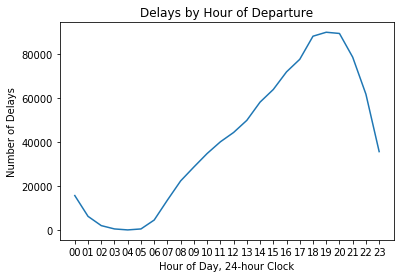

In [82]:
plt.title('Delays by Hour of Departure')
plt.xlabel('Hour of Day, 24-hour Clock')
plt.ylabel('Number of Delays')
plt.plot(x, y);

In [83]:
a = sorted(df_delays2.ArrHour.unique())
b = [df_delays2[df_delays2['ArrHour'] == i]['Origin'].count() for i in a]

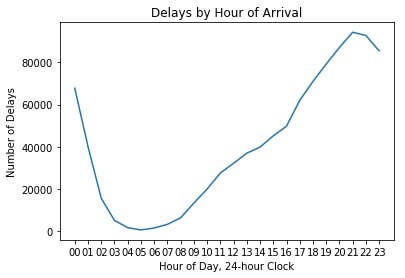

In [84]:
plt.title('Delays by Hour of Arrival')
plt.xlabel('Hour of Day, 24-hour Clock')
plt.ylabel('Number of Delays')
plt.plot(a, b);

Generally speaking there are more delays later in the day.  The early morning hours are not very informative since there are not many flight at that time but later in the day we can see that later flights experience more delays.  This is a fair comparison since we saw in the exploratory data that a fairly even spread of flights depart and arrive between 7am and midnight.  The concept of increased late arrivals later in the day makes sense since delays may compound as the day goes on and late arrivals cause further delays.

If such dynamic pricing were feasible then a travel insurance company might want to charge a higher premium for flights that leave later in the day.